# Problem
- Shopify has 100 sneaker shops
- Each shop sells a unique shoe
- Want to calculate an average order value
- Timeframe is 30 days

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns

In [27]:
# Import
df = pd.read_excel("2019 Winter Data Science Intern Challenge Data Set.xlsx")

In [28]:
df.head(2)

order_id  shop_id  user_id  order_amount  total_items payment_method  \
0         1       53      746           224            2           cash   
1         2       92      925            90            1           cash   

               created_at  
0 2017-03-13 12:36:56.190  
1 2017-03-03 17:38:51.999

In [29]:
# Check for NA's
df.isna().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [30]:
# Metrics per shop
shops = df.groupby(by = df["shop_id"]).sum()[['order_amount', 'total_items']]
shops.head(2)

order_amount  total_items
shop_id                           
1               13588           86
2                9588          102

In [31]:
shops['order_count'] = df['shop_id'].value_counts()

In [32]:
shops['AOV'] = shops['order_amount'] / shops['order_count']
shops

order_amount  total_items  order_count         AOV
shop_id                                                    
1               13588           86           44  308.818182
2                9588          102           55  174.327273
3               14652           99           48  305.250000
4               13184          103           51  258.509804
5               13064           92           45  290.311111
...               ...          ...          ...         ...
96              16830          110           51  330.000000
97              15552           96           48  324.000000
98              14231          107           58  245.362069
99              18330           94           54  339.444444
100              8547           77           40  213.675000

[100 rows x 4 columns]

In [33]:
# Average AOV per shop
shops['AOV'].mean()

3136.834087887025

In [34]:
shops.sort_values(by = 'AOV', ascending = False)

order_amount  total_items  order_count            AOV
shop_id                                                       
42           11990176        34063           51  235101.490196
78            2263800           88           46   49213.043478
50              17756           92           44     403.545455
90              19758          111           49     403.224490
38              13680           72           35     390.857143
...               ...          ...          ...            ...
53              14560          130           68     214.117647
100              8547           77           40     213.675000
32               7979           79           42     189.976190
2                9588          102           55     174.327273
92               6840           76           42     162.857143

[100 rows x 4 columns]

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AOV'>

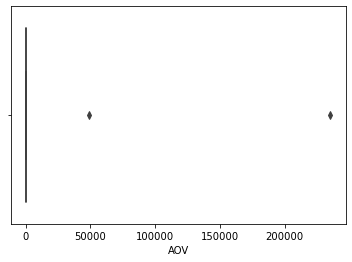

In [35]:
# Check for outliers 
sns.boxplot(shops['AOV'])

In [36]:
shops.loc[78]

order_amount    2.263800e+06
total_items     8.800000e+01
order_count     4.600000e+01
AOV             4.921304e+04
Name: 78, dtype: float64

In [37]:
# Drop shop_id 42 and 78
shops.drop(42, inplace = True)

No need to use statical method to determine how we should handle the outliers. The outliers should be removed as the AOV is enormously larger than the other shops.

In [38]:
shops.drop(78, inplace = True)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AOV'>

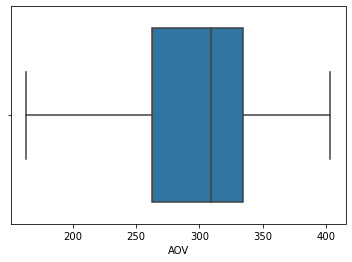

In [39]:
sns.boxplot(shops['AOV'])

In [78]:
# AOV after removal of outliers
shops['AOV'].mean()

299.68239912615485

In [90]:
# Deleting outliers from original dataframe as well
index_num = df[ (df['shop_id'] == 42) | (df['shop_id'] == 78)].index
df.drop(index_num, inplace = True)

# Answers to Question 1
a) The AOV metric involves calculting revenues and number of orders. Here, there were two outliers in which the AOV was much higher than the other stores. There are many possible factors to this, such as the type of store (luxury, retailer, etc.). 

As an example, A luxury shoe store may have a much lower number of orders, but can have the same revenue to the other shoe stores due to the expensive price of an individual shoe. Thus, their AOV shall be higher.


Overall, going one level furthur are grouping similiar shoes stores into categories based on a set of variables (revenue, number of orders per year) shall make the data more useful to evaluate.

b) There are a couple of notable metrics which may be of use to specific individuals. 

First, a count summary of the type of payment may be useful for individual store owners, as they can determine what customers use to pay the most often.

In [42]:
# From this, customers can know that generally customers pay using credit 35% of the time. 
df['payment_method'].value_counts() / np.sum(df['payment_method'].value_counts().tolist()) 

credit_card    0.3470
debit          0.3342
cash           0.3188
Name: payment_method, dtype: float64

Also, the 5 number summary often used in statistics can be useful here for the order amount and total items/order column. Such can give them a quick but descriptive overlook of sneaker stores general order amount per order or the total items sold per order, and where they place out of the population.

In [89]:
df[['order_amount']].describe().iloc[3:]

order_amount
min          90.0
25%         163.0
50%         284.0
75%         386.5
max        1086.0

In [87]:
df[['total_items']].describe().iloc[3:]

total_items
min          1.0
25%          1.0
50%          2.0
75%          3.0
max          8.0

c) Here, with the removal of outliers, the AOV is ~$300